In [44]:
# impoart important liberary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df=pd.read_csv("SampleSuperstore.csv")

In [46]:
df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
851,Second Class,Corporate,United States,Salinas,California,93905,West,Office Supplies,Paper,38.8800,6,0.00,18.6624
2511,First Class,Consumer,United States,Monroe,Louisiana,71203,South,Technology,Accessories,106.5000,6,0.00,41.5350
3992,Standard Class,Corporate,United States,Tampa,Florida,33614,South,Office Supplies,Supplies,41.3760,3,0.20,4.6548
9456,Standard Class,Corporate,United States,Greensboro,North Carolina,27405,South,Technology,Accessories,27.1920,3,0.20,0.3399
9544,Standard Class,Corporate,United States,Houston,Texas,77095,Central,Furniture,Bookcases,369.1992,3,0.32,-114.0174


In [23]:
#shape of dataset
df.shape

(9994, 13)

In [24]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [25]:
#checking duplicate
df.duplicated().sum()

17

In [26]:
#lets just drop the duplicates
df=df.drop_duplicates()

In [27]:
#again checking duplicated value
df.duplicated().sum()

0

In [28]:
#checking null values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [29]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [30]:
#checking the  correlation of data
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [31]:
df=df.drop(["Postal Code"],axis=1)

# checking outlier for the numeric columns using seaborn boxplot

Sales


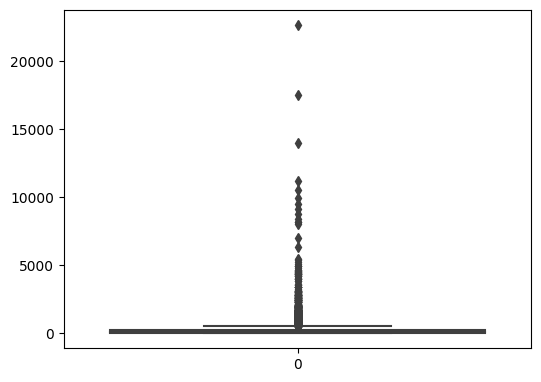

Quantity


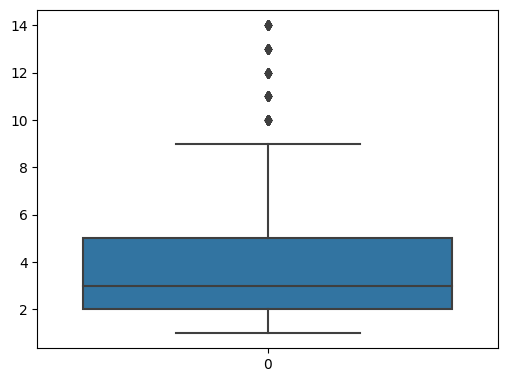

Discount


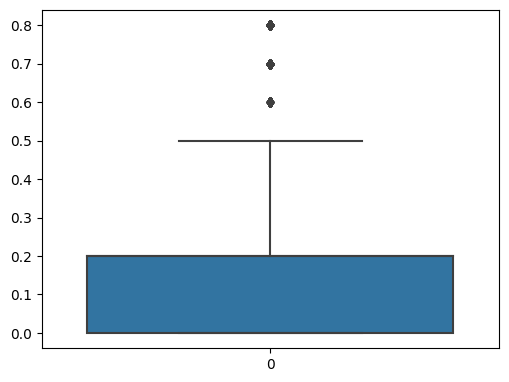

Profit


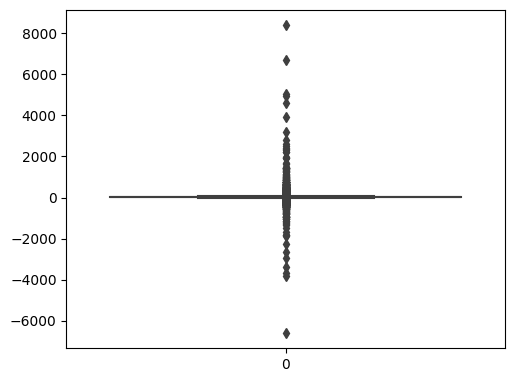

In [32]:
col=["Sales","Quantity","Discount","Profit"]
n=1
for columns in col:
    plt.figure(figsize=(20,15))
    print(columns)
    plt.subplot(4,4,n)
    n=n+1
    sns.boxplot(df[columns])
    plt.tight_layout()
    plt.show()

# Handling outlires

In [41]:
# handling outlire for Profit column
Q3=df.Profit.quantile(0.75)
Q1=df.Profit.quantile(0.25)
Q=Q3-Q1

low_limit=Q1-1.5*Q
high_limit=Q3+1.5*Q
low_limit
high_limit

df_new=df[(df["Profit"]>low_limit) & (df["Profit"]<high_limit)]
df.shape

(9977, 12)

In [42]:
#handling outlire for sales column
Q3=df.Sales.quantile(0.75)
Q1=df.Sales.quantile(0.25)
Q=Q3-Q1
low=Q1-1.5*Q
high=Q3+1.5*Q



In [43]:
df_nwe=df[(df.Sales>low) & (df.Sales<high)]
df.shape

(9977, 12)

In [36]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


# After handling outlire we have 8096 row and 12 columns

Sales


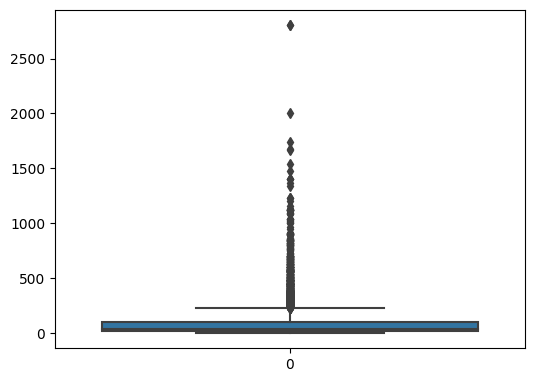

Quantity


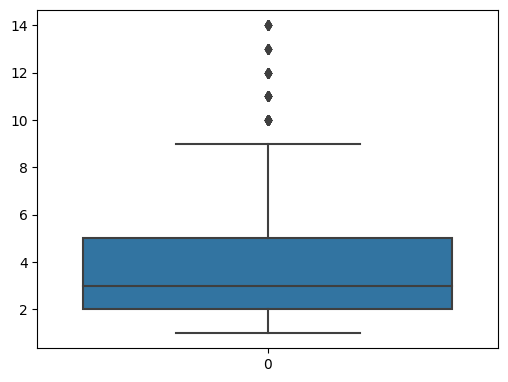

Discount


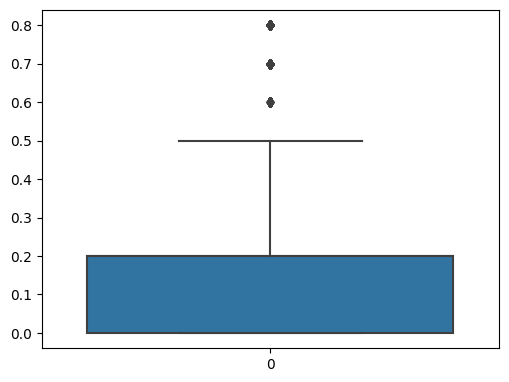

Profit


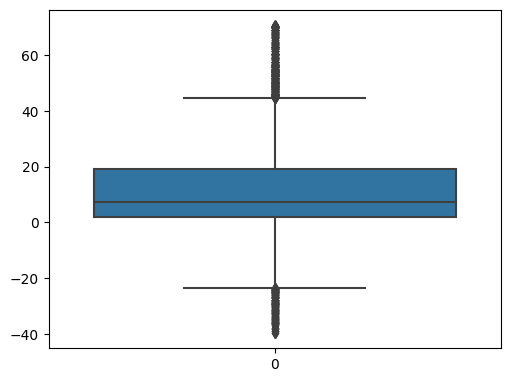

In [39]:
col=["Sales","Quantity","Discount","Profit"]
n=1
for columns in col:
    plt.figure(figsize=(20,15))
    plt.subplot(4,4,n)
    n=n+1
    print(columns)
    sns.boxplot(df_new[columns])
    plt.tight_layout()
    plt.show()

In [40]:
df_new.shape

(8096, 12)

# EDA ................. lets Explore data visually